# Fit Single Spectrum

In this notebook we will explore how to fit a single spectrum in LUCI given a region. We will be using the SN3 filter observation of M33 Field 7.

In [1]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir)  
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci
import LUCI.LuciPlotting as lplt
%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2024-05-10 09:44:49.015482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 09:44:49.234132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/src/heasoft-6.31.1/x86_64-pc-linux-gnu-libc2.35/lib
2024-05-10 09:44:49.234158: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-10 09:44:50.975176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror:

In [2]:
# Initialize paths and set parameters
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/export/home/carterrhea/M33'  # Path to data cube
#cube_dir = '/mnt/carterrhea/carterrhea/NGC628'  # Full path to data cube (example 2)
cube_name = 'M33_SN3'  # don't add .hdf5 extension
object_name = 'M33'
filter_name = 'SN3'
redshift = -0.0006  # Redshift of object
resolution = 5000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:49<00:00,  5.47s/it]


100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 3813.58it/s]


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

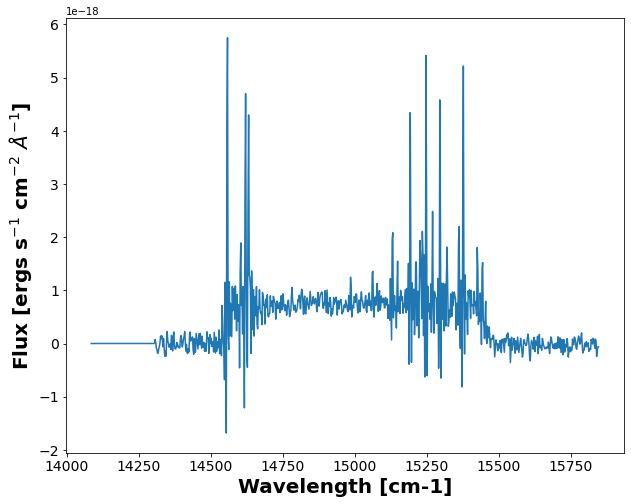

In [4]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(Luci_path+'Examples/regions/bkg_M33.reg', mean=True)
lplt.plot_spectrum(bkg_axis, bkg_sky)

We are now going to fit a region that I extracted from DS9. The region file is in `Luci_path/Examples/regions/M33_reg1.reg`.

(650.0, 670.0)

<Figure size 432x288 with 0 Axes>

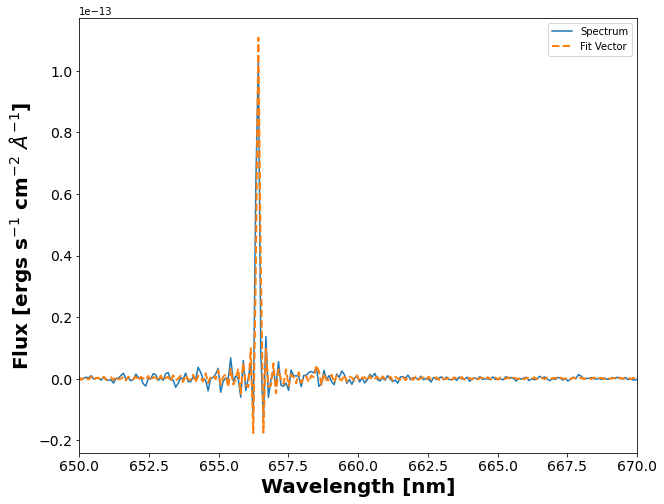

In [6]:
# Fit!
axis, sky, fit_dict = cube.fit_spectrum_region(
                                    ['NII6548', 'Halpha', 'NII6583'],
                                    'sincgauss',
                                    [1,1,1], [1,1,1],
                                    region=Luci_path+'Examples/regions/M33_reg1.reg', 
                                    bkg=bkg_sky)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'], units='nm')
plt.xlim(650, 670)